# Instrucciones del Proyecto

Instrucciones del proyecto
* Carga los datos.
* Preprocesa los datos, si es necesario.
* Realiza un análisis exploratorio de datos y haz tu conclusión sobre el desequilibrio de clases.
* Realiza el preprocesamiento de datos para el modelado.
* Entrena al menos tres modelos diferentes para el conjunto de datos de entrenamiento.
* Prueba los modelos para el conjunto de datos de prueba.
* Escribe algunas reseñas y clasifícalas con todos los modelos.
* Busca las diferencias entre los resultados de las pruebas de los modelos en los dos puntos anteriores. Intenta explicarlas.
* Muestra tus hallazgos.

# Carga de Librerías

In [67]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import re
import spacy

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

import sklearn.metrics as metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.corpus import stopwords as stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')




plt.style.use('seaborn-v0_8')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\omarh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\a

In [82]:
# usando progress_apply https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

Instrucciones del proyecto
* Carga los datos.
* Preprocesa los datos, si es necesario.
* Realiza un análisis exploratorio de datos y haz tu conclusión sobre el desequilibrio de clases.
* Realiza el preprocesamiento de datos para el modelado.
* Entrena al menos tres modelos diferentes para el conjunto de datos de entrenamiento.
* Prueba los modelos para el conjunto de datos de prueba.
* Escribe algunas reseñas y clasifícalas con todos los modelos.
* Busca las diferencias entre los resultados de las pruebas de los modelos en los dos puntos anteriores. Intenta explicarlas.
* Muestra tus hallazgos.

# Carga de datos

In [4]:
df_reviews = pd.read_csv('C:/Users/omarh/Documents/Tripleten/Proyectos/S14/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
# df_reviews = pd.read_csv(r'C:\Users\ramos\Documents\Tripleten\datasets\datasets\imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

# Preprocesamiento de datos

In [5]:
#Mostrando estructura y estadística descriptiva del dataset
display(df_reviews.describe())
display(df_reviews.info())



,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,47329.0,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,25562.917323,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,83670.039163,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

None

In [6]:
#Consultando filas nulas
df_reviews[df_reviews.isna().any(axis=1)]

#Eliminando filas nulas
df_reviews.dropna(inplace=True)

* **Se identificaron 2 filas con valores nulos en average_rating y votes. Dado que representan <0.005% del dataset, se eliminaron sin afectar la distribución.**

In [7]:
#Comprobando eliminación de nulos
df_reviews.isna().any().sum()

np.int64(0)

In [8]:
# Normalizando tipos de datos en columnas
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1), floa

Los datos no requieren normalización de tipos de datos en columnas debido a que ya vienen "pre- tratados"

# EDA

In [9]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47329.000000,47329.000000,47329.000000,47329.0,47329.000000,47329.000000,47329.000000
mean,1989.630882,0.001733,5.998278,25562.917323,5.484439,0.498933,6279.826808
std,19.600702,0.041588,1.494289,83670.039163,3.473083,0.500004,3605.724280
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6300.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


* Año mínimo: 1894
* Año máximo: 2010
* Evaluación media: 5.99/10
* Evaluación mínima y máxima : 1 - 10 

In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1), floa

In [11]:
df_reviews['review'].str.len()

0         715
1        1080
2        1016
3        1045
4        1085
         ... 
47326    1167
47327     626
47328    1149
47329    1817
47330     489
Name: review, Length: 47329, dtype: int64

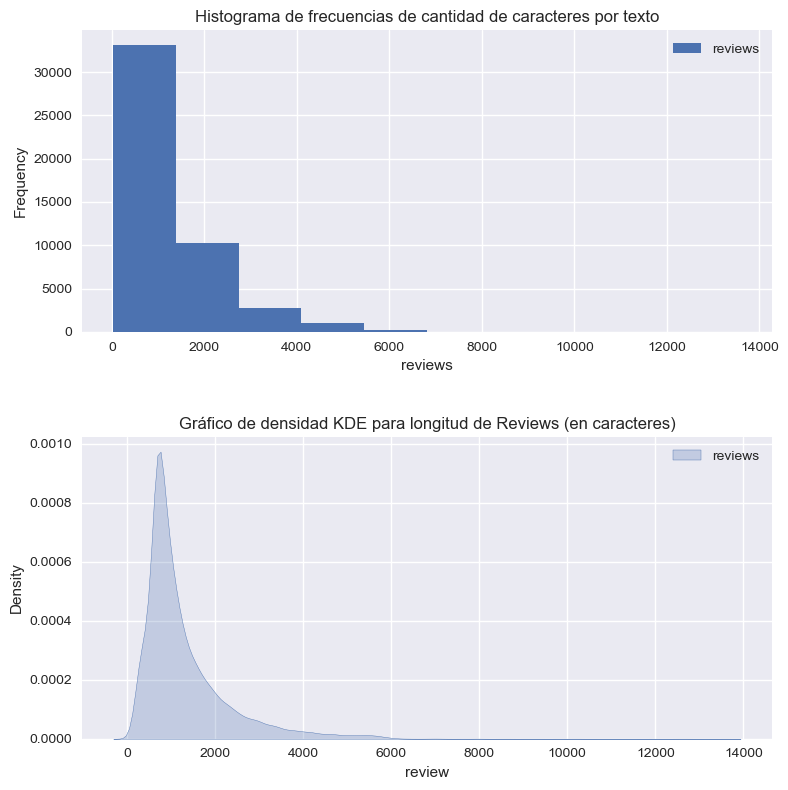

In [12]:
review_len = df_reviews['review'].str.len()
#Gráficando histograma de cantidad de caracteres por reseña 
fig , axs = plt.subplots(2,1 , figsize=(8,8))


# plt.subplots_adjust(hspace=0.4)


ax = axs[0]
review_len.hist(label ='reviews',ax = ax)
ax.legend()
ax.set_xlabel('reviews')
ax.set_ylabel('Frequency')
ax.set_title('Histograma de frecuencias de cantidad de caracteres por texto')


ax = axs[1]
sns.kdeplot(review_len, fill=True, label='reviews', ax= ax)
ax.legend()
ax.set_title('Gráfico de densidad KDE para longitud de Reviews (en caracteres)')


plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

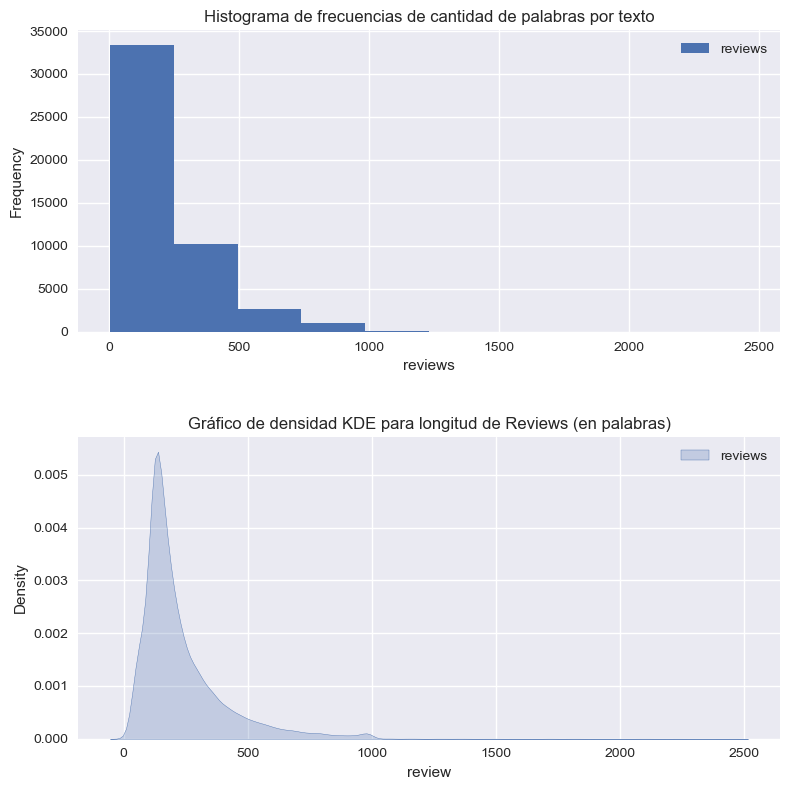

In [13]:
review_words = df_reviews['review'].str.split().str.len()
#Gráficando histograma de cantidad de palabras por reseña 
fig , axs = plt.subplots(2,1 , figsize=(8,8))



ax = axs[0]
review_words.hist(label ='reviews',ax = ax)
ax.legend()
ax.set_xlabel('reviews')
ax.set_ylabel('Frequency')
ax.set_title('Histograma de frecuencias de cantidad de palabras por texto')


ax = axs[1]
sns.kdeplot(review_words, fill=True, label='reviews', ax= ax)
ax.legend()
ax.set_title('Gráfico de densidad KDE para longitud de Reviews (en palabras)')


plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

Podemos observar que:

**Por cantidad de caracteres:**
* La mayor parte de las reseñas tienen entre 0 y 1500 caracteres
* Se tiene una mayor densisdad en menos de 2000 caracteres para los reviews
* Se tienen reviews con hasta 6000 caracteres sin embargo son muy pocos en relación al total

**Por cantidad de palabras:**
* La mayor parte de las reseñas tiene entre 0 y 250 palabras
* Se tiene una mayor densisdad en menos de 250 palabras para los reviews
* Se tienen reviews con hasta 1000 palabras sin embargo son muy pocos en relación al total

In [14]:
df_reviews['ds_part']

0        train
1        train
2         test
3         test
4         test
         ...  
47326     test
47327     test
47328     test
47329     test
47330     test
Name: ds_part, Length: 47329, dtype: object

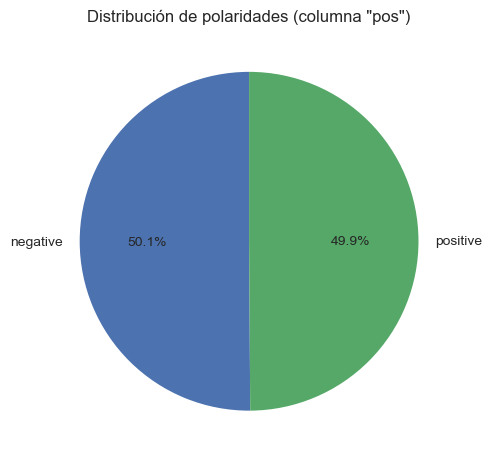

El porcentaje de reseñas positivas es del 49.9% 


In [15]:
counts = df_reviews['pos'].value_counts()
labels = ['negative' if x ==0 else 'positive' for x in counts.index]

plt.pie(counts, labels = labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de polaridades (columna "pos")')
plt.show()
ratio=round(len(df_reviews[df_reviews['pos']==1])/ len(df_reviews['pos']),3) *100
print(f'El porcentaje de reseñas positivas es del {ratio}% ' )

busquemos el no de reseñas por año por polaridad
+ KDE por polaridad

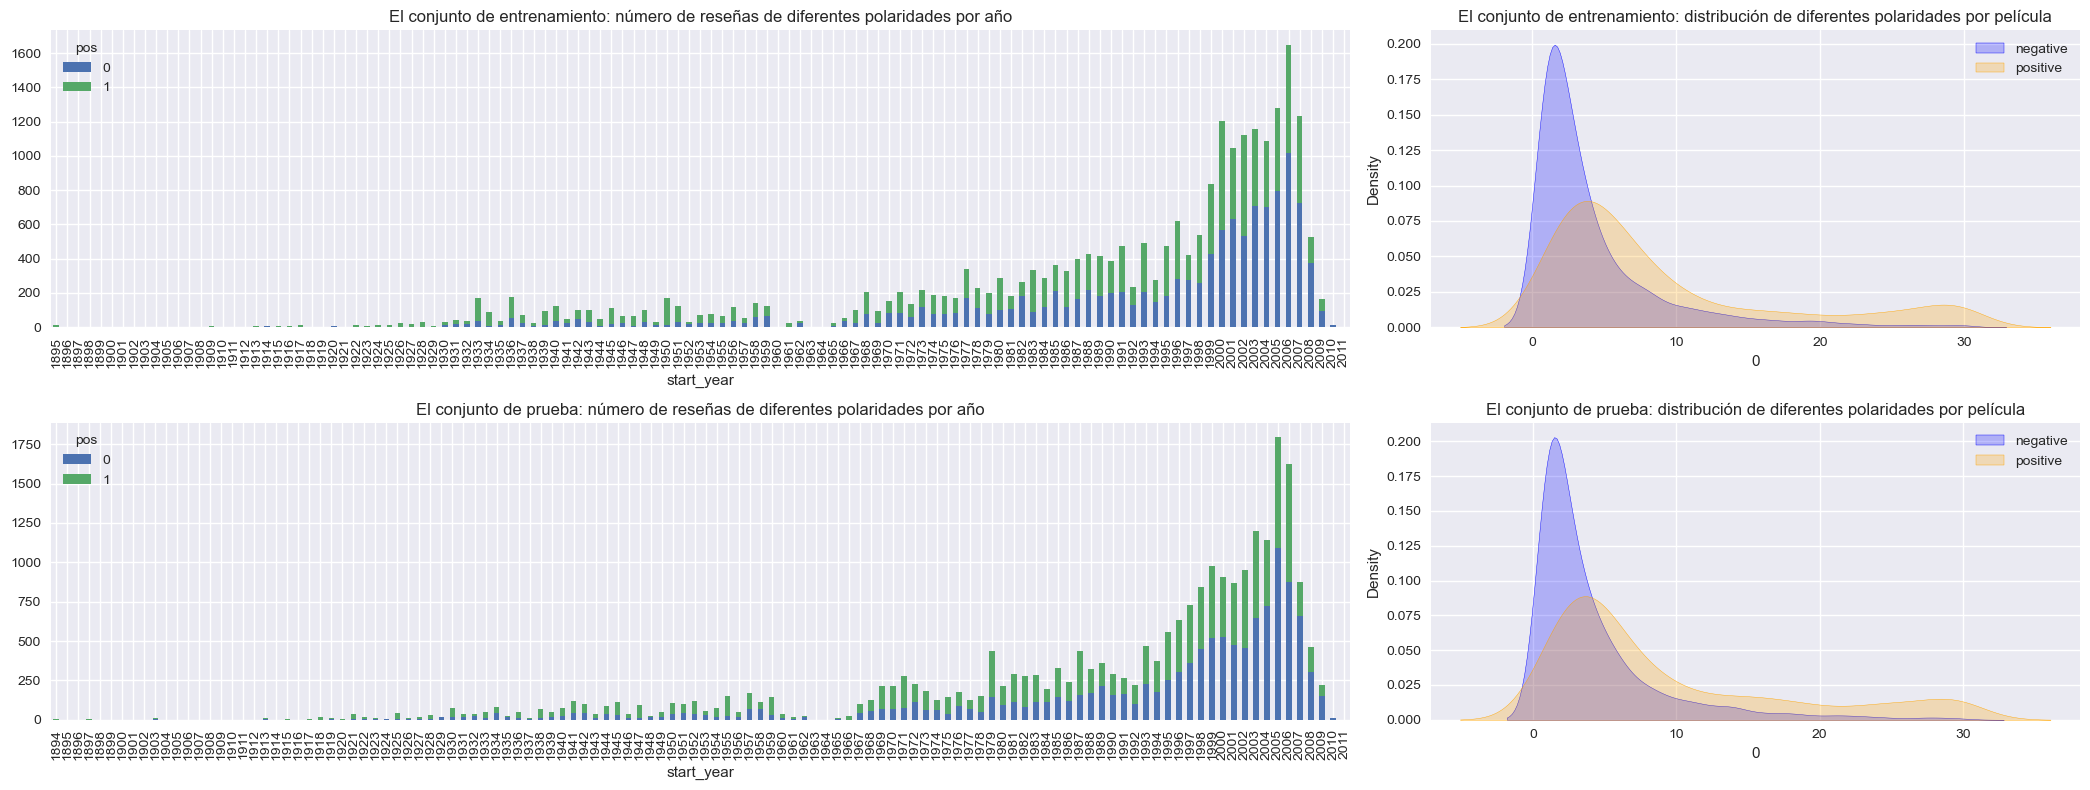

In [16]:
fig, axs = plt.subplots(2,2, figsize=(21,8),  gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

#
ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year','pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2012))).fillna(0)

dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

#
ax = axs[0][1]
dft = df_reviews.query('ds_part == "train"').groupby(['tconst','pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color = 'blue' , fill =True , label='negative', ax=ax)
sns.kdeplot(dft[1], color='orange',label ='positive', fill = True , ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

#----
ax = axs[1][0]
dft = df_reviews.query('ds_part == "test"').groupby(['start_year','pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2012))).fillna(0)


dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

#
ax = axs[1][1]
dft = df_reviews.query('ds_part == "test"').groupby(['tconst','pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', fill=True, label='negative', ax=ax)
sns.kdeplot(dft[1], color='orange', fill=True, label='positive', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()


## Conclusiones EDA

Podemos observar que : 
* Los datos disponibles son desde 1895 hasta 2010
* La cantidad de reseñas ha ido aumentando progresivamente con el paso de los años, seguramente por el acceso a internet, así como la integración de más usuarios en estas prácticas
* Las reseñas positivas y negativas aparecen más o menos en proporciones similares, se tienen algunos años donde predominan, sin embargo esto se puede deber a estrenos de películas muy taquilleras o relevantes para la historia del cine (Star wars, LOTR,etc.)


---------

**Los gráficos nos muestran que:**

* **La distribución de reseñas positivas y negativas en todo el dataset está balanceada casi a la perfección**


El gráfico KDE nos muestra que las reseñas por película arrojan un desequlibrio notable, veamos por grupo.
* **Podemos observar que las distribuciones de los datos son similares para los datos de prueba y entrenamiento**

**Las reseñas negativas:**
* Presentan variabilidad "baja" respecto a las reseñas positivas
* tienden a concentrarse en <5 por película, un pequeño grupo presenta entre 8 y 10


**Las reseñas positivas:**
* Presentan mayor variabilidad en relación a las reseñas negativas
* Los usuarios participan mayormente en reseñas positivas, presentando en su mayoría entre 3-6 reseñas
* Presentan una distribución más amplia, con una cola derecha larga que llega hasta 30 reseñas.


**El dataset se encuenta prácticamente balanceado (50/50), por lo que no será necesario aplicar técnicas de remuestreo.**



-----------

# Preprocesamiento para modelos

## Normalización

Todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [17]:
df_reviews['review'].iloc[1]

'How the hell did they get this made?! Presenting itself as a caper comedy, the misbegotten "$" is essentially two hours of people mumbling sentence fragments. The usually dependable Warren Beatty looks drunk, and the usually hilarious Goldie Hawn acts like she\'s on depressants. As for Gert Frobe, his most famous role - Goldfinger - was infinitely more admirable than his character here. Not even the guy with the champagne bottle of LSD can save this litany of worthlessness. Am I comparing this movie to "Plan 9 from Outer Space"? I wouldn\'t do such a thing even if someone paid me. "P9FOS" was idiotically made but ended up hilarious; this was idiotically made and causes you to feel like your brain just melted out of your ears. Warren Beatty and Goldie Hawn made up for this when they co-starred in "Shampoo", but then they co-starred in the dreadful "Town & Country". Maybe they just shouldn\'t co-star in movies. All in all, I would rather have my skin torn off than have to watch this aga

In [18]:
#Creando patron regex para eliminar signos de puntuación y dígitos
pattern = r'[^a-z-A-Z\s]'
#aplicando patron mediante lambda
df_reviews['review'] = df_reviews['review'].apply(lambda x : re.sub(pattern, ' ',x).strip().lower()  )
# aplicando regex para hacer todos los espacios en blanco uno solo
df_reviews['review'] = df_reviews['review'].apply(lambda x : re.sub(r'\s +', " ", x))


In [19]:
df_reviews['review'].iloc[1]

'how the hell did they get this made presenting itself as a caper comedy the misbegotten is essentially two hours of people mumbling sentence fragments the usually dependable warren beatty looks drunk and the usually hilarious goldie hawn acts like she s on depressants as for gert frobe his most famous role - goldfinger - was infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness am i comparing this movie to plan from outer space i wouldn t do such a thing even if someone paid me p fos was idiotically made but ended up hilarious this was idiotically made and causes you to feel like your brain just melted out of your ears warren beatty and goldie hawn made up for this when they co-starred in shampoo but then they co-starred in the dreadful town country maybe they just shouldn t co-star in movies all in all i would rather have my skin torn off than have to watch this again awful maybe they should remake it

## División de datos de entrenamiento y prueba

Los datos ya están divididos en entrenamiento/prueba, el indicador es "ds_part"

In [20]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)


(23796, 17)
(23533, 17)


# Función de evaluación

Vamos a evaluar los modelos con las siguientes métricas:
* F1
* ROC
* PRC



In [21]:
train_target

0        0
1        0
7        0
8        0
9        0
        ..
47253    1
47254    1
47255    1
47256    1
47257    0
Name: pos, Length: 23796, dtype: int64

In [114]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    eval_stats= {}

    fig, axs = plt.subplots(1,3, figsize = (20,6))
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
     
     
     eval_stats[type]= {}

     pred_target = model.predict(features)
     pred_proba = model.predict_proba(features)[:,1]


     #Exactitud
     eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)

    #F1 Score
     eval_stats[type]['F1'] = metrics.f1_score(target,pred_target)

    #F1 pred_proba
     f1_thresholds = np.arange(0,1.01, 0.05)
     f1_scores = [metrics.f1_score(target, pred_proba >= threshold) for threshold in f1_thresholds ]

     #ROC
     fpr,  tpr, roc_thresholds = metrics.roc_curve(target,pred_proba)
     roc_auc = metrics.roc_auc_score(target,pred_proba)
     eval_stats[type]['ROC AUC'] = roc_auc
     
     #PRC    
     precision, recall , pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
     aps = metrics.average_precision_score(target,pred_proba)
     eval_stats[type]['APS'] = aps
     



     #Graficando métricas------

     if type == 'train':
       color = 'blue'
     else:
       color = 'green'

     #Valor F1 ************************
     #-----------------------
     ax = axs[0]
     max_f1_score_idx = np.argmax(f1_scores)
     ax.plot(f1_thresholds , f1_scores, color = color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f} ' )
     
     
     #Graficando cruces de umbrales
     for threshold in(0.2, 0.4, 0.5, 0.6, 0.8):
        closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
        marker_color = 'orange' if threshold != 0.5 else 'red'
        ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color = marker_color, marker= 'X', markersize = 7)
     ax.set_xlim([-.02, 1.02])
     ax.set_ylim([-.02, 1.02])
     ax.set_xlabel('Threshold')
     ax.set_ylabel('F1')
     ax.legend(loc='lower center')
     ax.set_title(f'Valor F1')
     #-----------------------



     #ROC AUC CURVE  ***************************
     ax = axs[1]
     ax.plot(fpr, tpr, color = color, label=f'{type}, ROC_AUC={roc_auc:.2f}')
     #Graficando cruces de umbrales
     for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
       closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
       marker_color = 'orange' if threshold != 0.5 else 'red'
       ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize = 7 )
     
     ax.plot([0,1], [0,1], color='grey', linestyle='--')
     ax.set_xlim([-.02,1.02])
     ax.set_ylim([-.02, 1.02])
     ax.set_xlabel('FPR')
     ax.set_ylabel('TPR')
     ax.legend(loc='lower center')
     ax.set_title(f'Curva ROC')

     #-------
     
     #PRC (Precision recall curve)**********************
     ax=axs[2]
     plt.plot(recall, precision, color= color, label=f'{type}, AP={aps:.2f}')
     #Graficando cruces de umbrales
     for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
       closest_value_idx= np.argmin(np.abs(pr_thresholds - threshold))
       marker_color = 'orange' if threshold !=0.5 else 'red'
       ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
     ax.set_xlim([-.02,1.02])
     ax.set_ylim([-.02, 1.02])
     ax.set_xlabel('Recall')
     ax.set_ylabel('Precision')
     ax.legend(loc='lower center')
     ax.set_title(f'Curva PRC')
     #-----------------
    

    # Creando dataframe a partir de diccionario de métricas
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=['Exactitud', 'F1', 'APS', 'ROC AUC'])

    display(df_eval_stats)
     


# Trabajando con Modelos

## Modelo 0 - Constante

Evaluación del DummyClassifier:


,train,test
Exactitud,0.50,0.50
F1,0.67,0.67
APS,0.50,0.50
ROC AUC,0.50,0.50


----
----


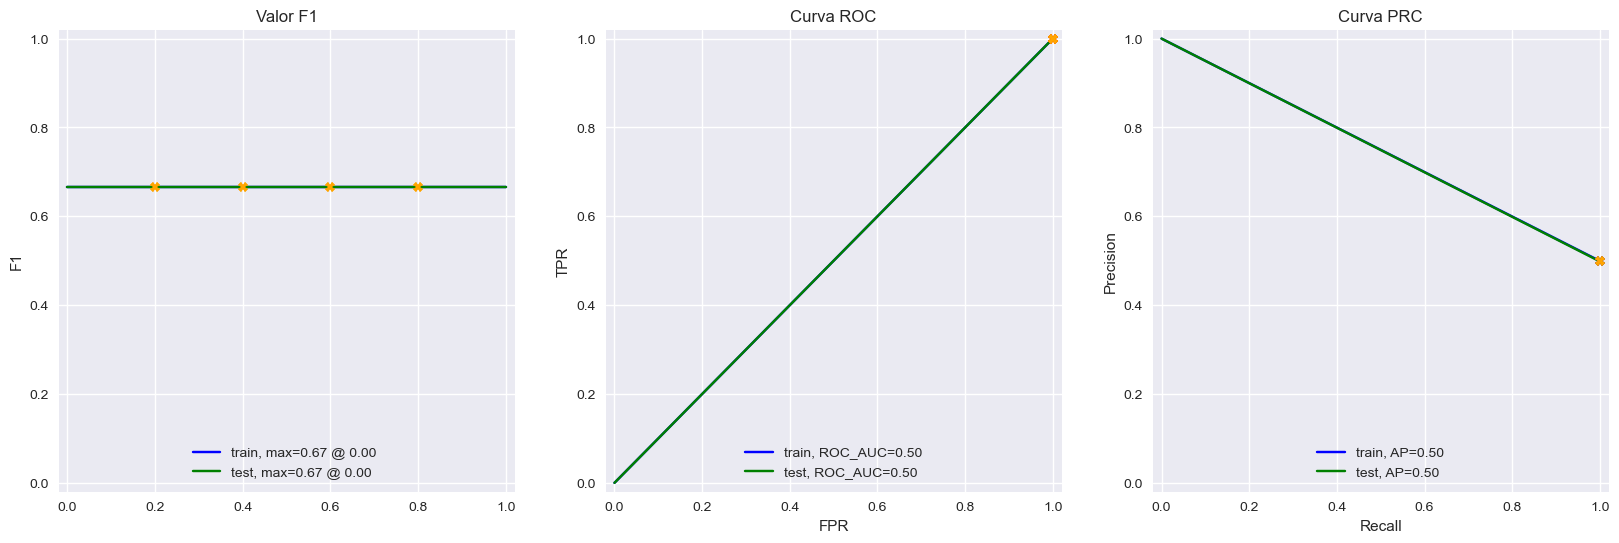

In [23]:
#Crear y entrenar el DummyClassifier
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(df_reviews_train[['pos']], train_target)

#Evaluando el Dummy Classifier
print('Evaluación del DummyClassifier:')
# print(evaluate_model(dummy_clf, df_reviews_train[['pos']], train_target, df_reviews_test[['pos']], test_target    ))
f1_scores, f1_thresholds = evaluate_model(dummy_clf, df_reviews_train[['pos']], train_target, df_reviews_test[['pos']], test_target    )

## Modelo NLTK, TF-IDF Y LR

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords

### Tokenización y Lematización

In [98]:
#definiendo stop words
stop_words = list(nltk_stopwords.words('english'))
#Creando Lematizer object
lemmatizer = WordNetLemmatizer()

# Convirtiendo etiquetas POS treebank a POS WordNet
def get_wordnet(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #Por defecto, se considera como sustantivo
    
def preprocess_text_nltk(reviews):
    #Crear tokens
    tokens = word_tokenize(reviews)
    # Etiquetas POS para los tokens
    pos_tags = nltk.pos_tag(tokens) #[('The', 'DT'), ('movie', 'NN'), ('amazing', 'JJ'),...]
    #Cada elemento es(token, POS_tag)

    # return pos_tags
    #Creando lemmas
    lemmas= [lemmatizer.lemmatize(token, get_wordnet(pos)) for token, pos in pos_tags]
    

    return ' '.join(lemmas)

In [73]:
#Porbando lematización con frase dummy
print(preprocess_text_nltk(df_reviews.iloc[1]['review']))

how the hell do they get this make present itself a a caper comedy the misbegotten be essentially two hour of people mumble sentence fragment the usually dependable warren beatty look drunk and the usually hilarious goldie hawn act like she s on depressant a for gert frobe his most famous role - goldfinger - be infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness be i compare this movie to plan from out space i wouldn t do such a thing even if someone pay me p fo be idiotically make but end up hilarious this be idiotically make and cause you to feel like your brain just melt out of your ear warren beatty and goldie hawn make up for this when they co-star in shampoo but then they co-star in the dreadful town country maybe they just shouldn t co-star in movie all in all i would rather have my skin tear off than have to watch this again awful maybe they should remake it with jackie chan then i would pay t

In [ ]:
#Preprocesando (Lematizando) reviews con NLTK
df_reviews_train['review_nltk'] = df_reviews_train['review'].progress_apply(preprocess_text_nltk)
df_reviews_test['review_nltk'] =  df_reviews_test['review'].progress_apply(preprocess_text_nltk)

100%|██████████| 23533/23533 [04:17<00:00, 91.46it/s] 


In [93]:
df_reviews_train['review_nltk'].iloc[1]

'how the hell do they get this make present itself a a caper comedy the misbegotten be essentially two hour of people mumble sentence fragment the usually dependable warren beatty look drunk and the usually hilarious goldie hawn act like she s on depressant a for gert frobe his most famous role - goldfinger - be infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness be i compare this movie to plan from out space i wouldn t do such a thing even if someone pay me p fo be idiotically make but end up hilarious this be idiotically make and cause you to feel like your brain just melt out of your ear warren beatty and goldie hawn make up for this when they co-star in shampoo but then they co-star in the dreadful town country maybe they just shouldn t co-star in movie all in all i would rather have my skin tear off than have to watch this again awful maybe they should remake it with jackie chan then i would pay 

### TF-IDF

In [100]:
#Inicializando Tf IDFVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 1000)

#Ajustando  y transformando mediante TF IDF vectorizer
train_features_tf_idf_nltk = tfidf_vectorizer.fit_transform(df_reviews_train['review_nltk'])
test_features_tf_idf_nltk = tfidf_vectorizer.transform(df_reviews_test['review_nltk'])

display(train_features_tf_idf_nltk.shape)
display(test_features_tf_idf_nltk.shape)


(23796, 1000)

(23533, 1000)

### Modelo LR

In [104]:
model_1 = LogisticRegression()
model_1.fit(train_features_tf_idf_nltk,train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluación del modelo 1  - NÑTK , TF-IDF + LR


,train,test
Exactitud,0.87,0.86
F1,0.88,0.86
APS,0.94,0.93
ROC AUC,0.95,0.94


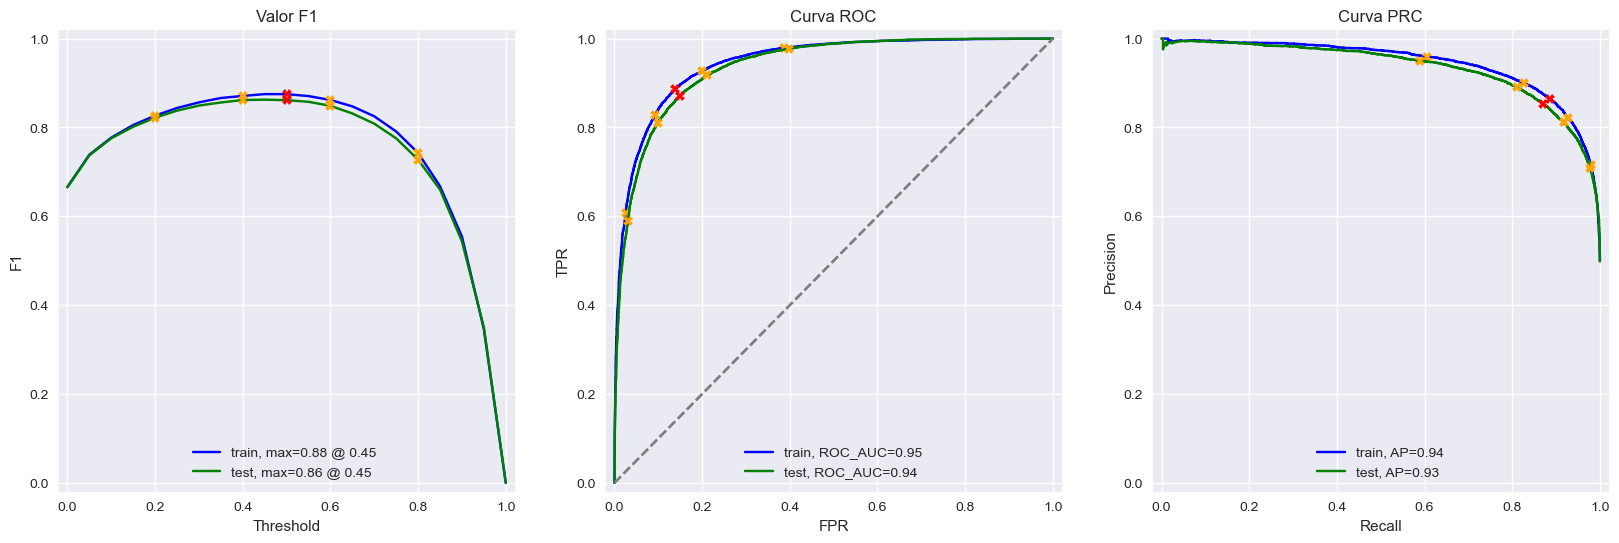

In [116]:
#Evaluando modelo 1 -NLTK , TF-IDF + LR
print('Evaluación del modelo 1  - NÑTK , TF-IDF + LR')
evaluate_model(model_1, train_features_tf_idf_nltk, train_target, test_features_tf_idf_nltk, test_target)

Podemos observar que:


**Exactitud:**
* La exactitud del modelo fue de .87 para el conjunto de entrenamiento y 0.86 para el conjunto de prueba, esto indica que el modelo "acertó" en el 87% de sus predicciones

**Valor F1:**
* El valor óptimo para el threshold es de 0.45
* El valor máximo para el conjunto de **entrenamiento** fue de 0.88 en un umbral de 0.45
* El valor máximo para el conjunto de **prueba** fue de 0.88 en un umbral de 0.45
* El modelo se comportó de manera excelente algeneralizar, tiene un equilibrio entre "cuantos de los datos positivos realmente fueron positivos" (Precision) y los verdaderos positivos detectados (Recall) 

**Valor APS:**
* Indica que el modelo ordena muy bien las observaciones según su probabilidad de ser positivas, manteniendo una alta precisión a lo largo de diferentes niveles de recall

**AUC ROC Curve:**
* Con valores de 0.95 y 0.94 respectivamente, podemos concluir que el modelo es muy bueno a la hora de separar (definir) las clases del target independientemente del threshold.

**Conclusiones generales:**

* **El modelo muestra una excelente capacidad de generalización, con métricas muy similares entre entrenamiento y prueba. Su desempeño en F1, AUC y APS refleja un clasificador estable, bien calibrado y con fuerte habilidad para distinguir entre clases. No existen señales de sobreajuste y el threshold óptimo (~0.45) mejora el balance entre precisión y recall por encima del valor estándar (0.5).**

## Modelo 3 - SpaCy, TF-IDF + LR

In [117]:
import sys
sys.executable


'c:\\Users\\omarh\\anaconda3\\envs\\proyecto_nlp\\python.exe'

In [118]:
#Creando instancia tokenizer
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

In [ ]:
def text_preprocessing_3(text):
    #Creando documento
    doc = nlp(text.lower())
    #Creando lemmas
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    ' '.join(lemmas)

# SIDE QUEST: VERIFICAR QUE PALABRAS SON LAS MÁS INFLUYENTES PARA EL MODELO

qué palabras influyen MÁS en que el modelo prediga positivo,

qué palabras influyen MÁS en que prediga negativo,

cuando usas TF-IDF + Logistic Regression.